In [1]:
import pandas as pd     #provides wide variety tools for data analysis,many inbuilt methods for grouping, combining and filtering data.
import numpy as np      #for some basic mathematical operations
from matplotlib import pyplot as plt #comprehensive library for creating static, animated, and interactive visualizations
import seaborn as sns                #  high-level interface for drawing attractive and informative statistical graphics

from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import Lasso, LinearRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

from sklearn.inspection import permutation_importance 
import multiprocessing

import xgboost as xgb
from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

In [31]:
data = pd.read_csv('/home/pato/Magister Data Science/Segundo Trimestre Data Science/Analisis de Datos para Data Science/Capstone Project/Clean_SeoulBikeData.csv',
                   encoding='unicode escape')

In [32]:
data.head()

,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,12,0,0,1,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,12,0,0,1,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,12,0,0,1,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,12,0,0,1,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,12,0,0,1,1


In [41]:
#transformación a dummie variables categoricas independientes
dummies = data[['Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday']]

#variables numericas independientes
X_numerical = data.drop('Rented Bike Count', axis=1)
X_numerical = X_numerical.drop(dummies, axis=1)
X_numerical

,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,12
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,12
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,12
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,12
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,12
...,...,...,...,...,...,...,...,...,...,...
8460,19,4.2,34,2.6,1894,0.0,0.0,0.0,30,11
8461,20,3.4,37,2.3,2000,0.0,0.0,0.0,30,11
8462,21,2.6,39,0.3,1968,0.0,0.0,0.0,30,11
8463,22,2.1,41,1.0,1859,0.0,0.0,0.0,30,11


In [42]:
#nombre variables numericas
list_numerical = X_numerical.columns

#variables independientes final
X = pd.concat([X_numerical, dummies], axis=1)
y = data['Rented Bike Count']

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

In [44]:
standard = StandardScaler()

X_train[list_numerical] = standard.fit_transform(X_train[list_numerical])
X_test[list_numerical] = standard.transform(X_test[list_numerical])

# Regresion Lineal

R^2 is 0.54
 RMSE is: 446.95


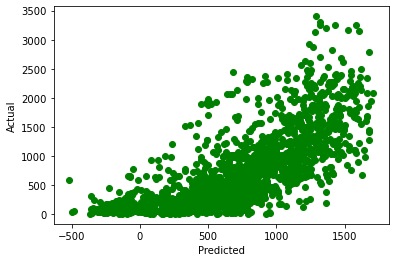

In [76]:
LR = LinearRegression()

LR.fit(X_train,y_train)
y_pred_LR=LR.predict(X_test)
plt.scatter(y_pred_LR,y_test,color='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {round(LR.score(X_test,y_test),2)}\n RMSE is: {round(mean_squared_error(y_test,y_pred_LR,squared=False),2)}')

# Lasso

R^2 is 0.54
 RMSE is: 447.12


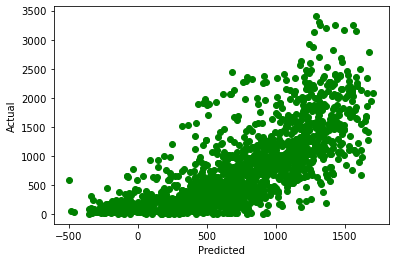

In [77]:
lasso = Lasso(alpha=1)

lasso.fit(X_train,y_train)
y_pred_lasso=lasso.predict(X_test)
plt.scatter(y_pred_lasso,y_test,color='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {round(lasso.score(X_test,y_test),2)}\n RMSE is: {round(mean_squared_error(y_test,y_pred_lasso,squared=False),2)}')

In [78]:
#explorando los coeficientes de la regresión. Hay dos coeficientes con valores cercanos a cero
lasso.coef_

array([ 200.37163989,  311.80289674, -167.09684485,   17.65027839,
          9.32329978,  -69.1289369 ,  -69.91827382,   14.34391899,
         -7.13979955,   12.31489648, -105.73970932, -116.21638213,
       -349.39351454,   79.57128089])

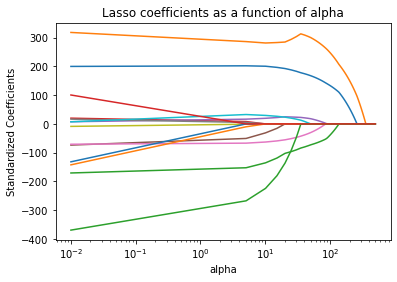

In [79]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [80]:
# Lasso with 5 fold cross-validation
lassocv = LassoCV(cv=10, random_state=37, max_iter=100000)

# Fit model
lassocv.fit(X_train, y_train)

lassocv.alpha_

0.3575223547961192

R^2 is 0.54
 RMSE is: 446.98


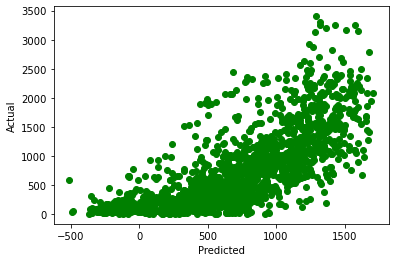

In [82]:
# Set best alpha
lasso_best = Lasso(alpha=lassocv.alpha_)
lasso_best.fit(X_train, y_train)
y_pred_lassobf=lasso_best.predict(X_test)
plt.scatter(y_pred_lassobf,y_test,color='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {round(lasso_best.score(X_test,y_test),2)}\n RMSE is: {round(mean_squared_error(y_test,y_pred_lassobf,squared=False),2)}')

# Random Forest

R^2 is 0.89
 RMSE is: 219.49


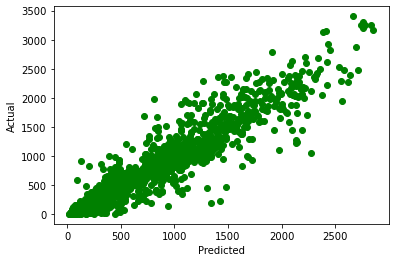

In [83]:
rf = RandomForestRegressor()

rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
plt.scatter(y_pred_rf,y_test,color='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {round(rf.score(X_test,y_test),2)}\n RMSE is: {round(mean_squared_error(y_test,y_pred_rf,squared=False),2)}')

In [84]:
# Grid de hiperparámetros evaluados
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }

grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
0,None,5,150,-226.462827,8.415614,-84.300526,1.051251
9,20,5,150,-226.700255,8.729938,-86.138760,1.101942
1,None,7,150,-226.723963,8.985796,-84.272057,1.163101
10,20,7,150,-226.926051,8.428376,-85.580686,1.121216


In [85]:
modelo_final = grid.best_estimator_
y_pred_rf_best = modelo_final.predict(X = X_test)
rmse_final = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred_rf_best,
        squared = False
       )
print(f"El error (rmse) de test es: {round(rmse_final,2)}")
print(f'R^2 is {round(modelo_final.score(X_test,y_test),2)}')

El error (rmse) de test es: 219.0
R^2 is 0.89


In [86]:
importancia_predictores_rf = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': modelo_final.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_rf.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,Hour,0.299868
1,Temperature(Â°C),0.236802
2,Humidity(%),0.101223
12,Seasons_Winter,0.081880
5,Solar Radiation (MJ/m2),0.072508
9,Month,0.062022
6,Rainfall(mm),0.041997
4,Visibility (10m),0.030210
3,Wind speed (m/s),0.027691
8,Day,0.023757


In [87]:
importancia = permutation_importance(
                estimator    = modelo_final,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
0,440.453520,3.999482,Hour
1,329.173999,3.757917,Temperature(Â°C)
2,178.147922,2.795507,Humidity(%)
5,155.545728,1.753120,Solar Radiation (MJ/m2)
12,128.800919,1.986414,Seasons_Winter
9,113.784485,1.365704,Month
6,73.442128,4.130560,Rainfall(mm)
4,55.245233,0.873157,Visibility (10m)
3,51.137721,0.388990,Wind speed (m/s)
8,49.358200,0.566250,Day


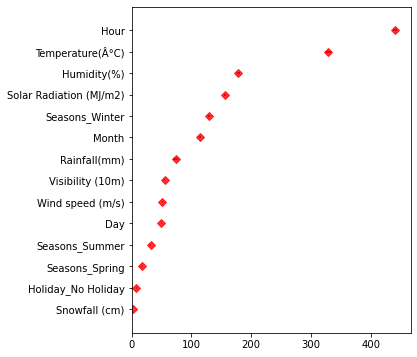

In [88]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
plt.show()

In [89]:
model_data = {
    'Models': ['LinearRegression', 'Lasso', 'RandomForest'],
    'Test_R2_Score': [round(LR.score(X_test,y_test),2),
                      round(lasso_best.score(X_test,y_test),2),
                      round(modelo_final.score(X_test,y_test),2)],
    'Test_RMSE_Score': [round(mean_squared_error(y_test,y_pred_LR,squared=False),2),
                        round(mean_squared_error(y_test,y_pred_lassobf,squared=False),2),
                        round(mean_squared_error(y_test,y_pred_rf_best,squared=False),2)]
}

In [90]:
df_all_model=pd.DataFrame(model_data)
df_all_model

,Models,Test_R2_Score,Test_RMSE_Score
0,LinearRegression,0.54,446.95
1,Lasso,0.54,446.98
2,RandomForest,0.89,219.00
